In [15]:
# Importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

In [16]:
# Loading CSV file into a DataFrame
raw_data=pd.read_csv('/Users/akhilelugam/Library/Containers/com.microsoft.Excel/Data/Downloads/alldata 2.csv')

Toatl number of firms with data science job vacancies 2213
Top 10 firms with most vacancies                                      company  position
122                               Amazon.com       358
230                           Ball Aerospace       187
1270                               Microsoft       137
866                                   Google       134
1328                      NYU Langone Health        77
798   Fred Hutchinson Cancer Research Center        70
1095                                    KPMG        66
1136                                  Lab126        50
748                                 Facebook        49
324                          Broad Institute        49
2101                       Walmart eCommerce        45
1248                      McKinsey & Company        41
1876                   Takeda Pharmaceutical        39
2040                University of Washington        39
928                                  Harnham        39
1421                        

Text(0, 0.5, '# OF JOBS')

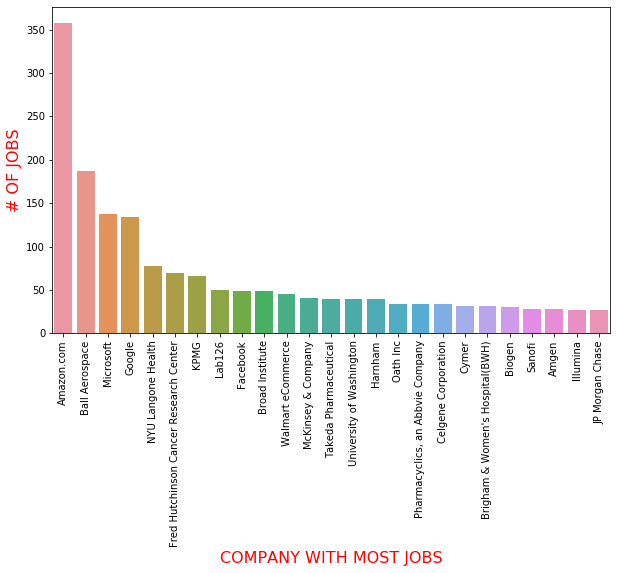

In [17]:
# Data Analysis
#Now, we are finding total number of compnaies who require data scientist
total_no_company=raw_data['company'].nunique()
print('Toatl number of firms with data science job vacancies',total_no_company)

#finding highest number of vacancy in a company
most_vacancy= raw_data.groupby(['company'])['position'].count()
most_vacancy=most_vacancy.reset_index(name='position')
most_vacancy=most_vacancy.sort_values(['position'],ascending=False)
pareto_df=most_vacancy
most_vacancy=most_vacancy.head(25)
print('Top 10 firms with most vacancies',most_vacancy)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="company", y="position", data=most_vacancy)    
ax.set_xticklabels(most_vacancy['company'],rotation=90)  
ax.set_xlabel('COMPANY WITH MOST JOBS',fontsize=16, color='red')
ax.set_ylabel('# OF JOBS',fontsize=16,color='red') 

Toatl number of roles across all the firms 5242
Top 15 most wanted roles across firms                                  position  company
1026                       Data Scientist      351
3833                Senior Data Scientist       96
3115                     Research Analyst       64
928                         Data Engineer       60
2152            Machine Learning Engineer       56
2071                  Lead Data Scientist       31
3276                   Research Scientist       30
4685                   Sr. Data Scientist       28
2660             Principal Data Scientist       24
879                          Data Analyst       22
4443                    Software Engineer       22
2977                 Quantitative Analyst       21
3486                            Scientist       17
2837                      Product Manager       17
495              Bioinformatics Scientist       16
2300              Market Research Analyst       15
4245             Senior Software Engineer      

Text(0, 0.5, 'NO OF ROLES ACROSS INDUSTRY')

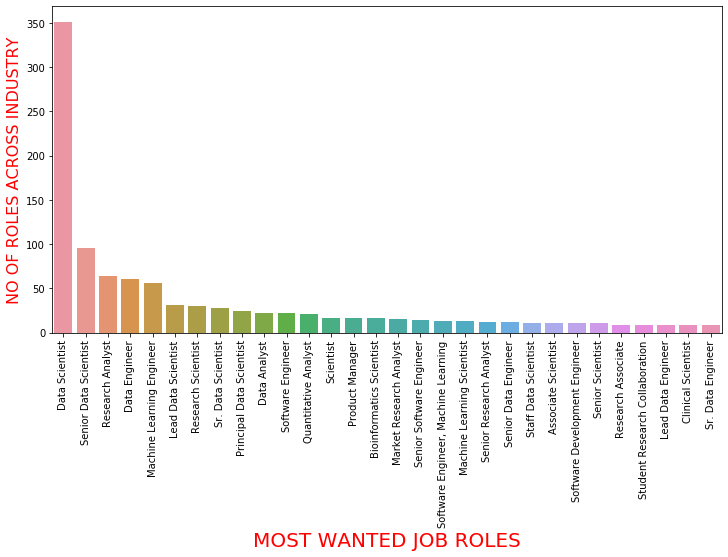

In [18]:
# Finding total number of unique roles in data science domain from the given dataset
total_no_roles=raw_data['position'].nunique()
print('Toatl number of roles across all the firms',total_no_roles)

# most offered roles across all the firms
most_offd_roles=raw_data.groupby(['position'])['company'].count()   
most_offd_roles=most_offd_roles.reset_index(name='company')
most_offd_roles=most_offd_roles.sort_values(['company'],ascending=False)
most_offd_roles=most_offd_roles.head(30)   
print('Top 15 most wanted roles across firms',most_offd_roles)

# Plot graph for top most offered roles
fig,ax=plt.subplots(figsize=(12,6))
ax=seaborn.barplot(x="position", y="company", data=most_offd_roles)    
ax.set_xticklabels(most_offd_roles['position'],rotation=90)
ax.set_xlabel('MOST WANTED JOB ROLES',fontsize=20,color='red')
ax.set_ylabel('NO OF ROLES ACROSS INDUSTRY',fontsize=16,color='red')#

Text(0.5, 0, 'Company Name')

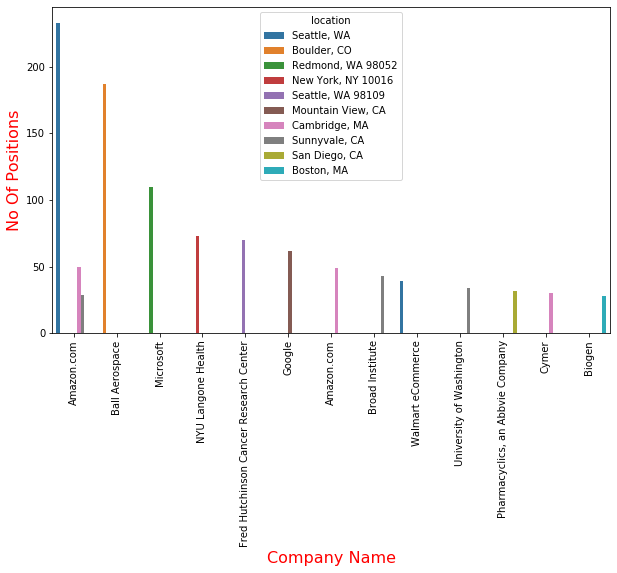

In [19]:
# Finding total number of cities with Data science jobs
total_no_cities=raw_data['location'].nunique()

#cities and total no of openings w.r.t companies
city_and_roles=raw_data.groupby(['location','company'])['position'].count()     
city_and_roles=city_and_roles.reset_index()
city_and_roles=city_and_roles.sort_values(['position'],ascending=False)
city_and_roles=city_and_roles.head(15) 

# Plot graph for top most cities and no of roles
fig,a=plt.subplots(figsize=(10,6))             
a=seaborn.barplot(x="company", y="position", hue="location", data=city_and_roles);    
a.set_xticklabels(city_and_roles['company'],rotation=90)   
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Company Name',fontsize=16,color='red')  

In [20]:
#PART 2, PARETO CHART
# trying to find if the given data set follows Pareto(80,20) rule

#find the total job openings
total_job_openings=len(raw_data['position'])

#find 70% total job (total_job_openings) openings, pareto rule,can be (80,20) or (70,20)
sum_70_percent_job_openings=total_job_openings/100*70

#find 20% total number of companies
sum_20_percent_companies=total_no_company/100*20

#now find the total number of job openings from those 20% top comapnies 
top_20_companies_job_openings=pareto_df.head(443)

sum_=top_20_companies_job_openings['position'].sum()

print('70% of the total job openings is :',sum_70_percent_job_openings )

print('total job openings from top 20% of the companies :',sum_)

print ('so, 70% of the total job openings and total job openings from top 20% of the companies are almost equal. Therefore we can say the data set follows Pareto Rule')

70% of the total job openings is : 4874.8
total job openings from top 20% of the companies : 4675
so, 70% of the total job openings and total job openings from top 20% of the companies are almost equal. Therefore we can say the data set follows Pareto Rule


In [21]:
# Creating only 5 datascience roles among all
data=raw_data.copy()
data.dropna(subset=['position'], how='all', inplace = True)
data['position']=[x.upper() for x in data['position']]
data['description']=[x.upper() for x in data['description']]

data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]

position=data.groupby(['position'])['company'].count()   
position=position.reset_index(name='company')
position=position.sort_values(['company'],ascending=False)
print('Here is  the count of each new roles we created :', '\n\n', position)


Here is  the count of each new roles we created : 

                     position  company
2             Data Scientist     2645
3  Machine Learning Engineer     1384
4                     Others     1295
0               Data Analyst      848
1       Data Science Manager      781


In [22]:
# Next Part in ML Algorithm is Data Cleansing
X=data.description
Y=data.position

X=[re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X=[re.sub("[0-9]+",' ',k) for k in X]

#applying stemmer
ps =PorterStemmer()
X=[ps.stem(k) for k in X]

tfidf=TfidfVectorizer()
label_enc=LabelEncoder()

X=tfidf.fit_transform(X)
Y=label_enc.fit_transform(Y)

x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3)

In [23]:
# first algorithm SVM
#SVM classification
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)

svm_y=svm.predict(x_test)

print('Accuracy of SVM :', accuracy_score(y_test,svm_y))
print ('Confusion Matrix of SVM : ', '\n\n', confusion_matrix(y_test,svm_y))


Accuracy of SVM : 0.7646212847555129
Confusion Matrix of SVM :  

 [[185  10  32   4  23]
 [ 12 117  55  13  37]
 [  6   3 753  16  16]
 [  2   6  73 321  13]
 [ 10  20 105  35 219]]


In [29]:
#Naive Bayes classification
NB=MultinomialNB()
NB.fit(x_train,y_train)
NB_y=NB.predict(x_test)

print('Accuracy of NB :', accuracy_score(y_test,NB_y))
print ('Confusion Matrix of NB : ', '\n\n', confusion_matrix(y_test,NB_y))


Accuracy of NB : 0.411313518696069
Confusion Matrix of NB :  

 [[  0   0 251   2   1]
 [  0   0 232   2   0]
 [  0   0 794   0   0]
 [  0   0 361  54   0]
 [  0   0 358  21  10]]


In [31]:
#3rd Classifier SGDC
#SGD classification
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd_y=sgd.predict(x_test)

print('Accuracy of SGD :', accuracy_score(y_test,sgd_y))
print ('Confusion Matrix of SGD : ', '\n\n', confusion_matrix(y_test,sgd_y))


Accuracy of SGD : 0.7909875359539789
Confusion Matrix of SGD :  

 [[200   7  19   7  21]
 [  9 142  38  16  29]
 [  8   5 721  27  33]
 [  5   7  50 340  13]
 [ 15  27  67  33 247]]


In [34]:
#4th Classifier 
#XGBOOST classification
xgboost=GradientBoostingClassifier(n_estimators=90)
xgboost.fit(x_train,y_train)
xgboost_y=xgboost.predict(x_test)

print('Accuracy of XGBOOST :', accuracy_score(y_test,xgboost_y))
print ('Confusion Matrix of XGBOOST : ', '\n\n', confusion_matrix(y_test,xgboost_y))


Accuracy of XGBOOST : 0.7957813998082455
Confusion Matrix of XGBOOST :  

 [[187  10  33   4  20]
 [  2 153  35  10  34]
 [ 11  10 731  20  22]
 [  6   4  42 339  24]
 [ 11  30  73  25 250]]


In [35]:
# Inverse Transform of label Encoder
print (label_enc.inverse_transform([0,1,2,3,4]))

['Data Analyst' 'Data Science Manager' 'Data Scientist'
 'Machine Learning Engineer' 'Others']
